# Exploratory Data Analysis - Land Case Simulation

This notebook explores the land data for our simulation project.

In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px

# Tambahkan path ke direktori src
current_dir = os.getcwd()
# Jika notebook berada di subdirektori notebooks, naik satu level ke root project
project_root = os.path.dirname(current_dir)
src_path = os.path.join(project_root, 'src')

if src_path not in sys.path:
    sys.path.append(src_path)

# Impor modul custom
try:
    from data_ingestion import load_config, read_shapefile
    from data_processing import clean_geospatial_data
    from visualization import create_interactive_map, save_plotly_figure
    print("✓ Semua modul berhasil diimpor!")
except ImportError as e:
    print(f"✗ Error mengimpor modul: {e}")
    print("Pastikan:")
    print("1. Direktori 'src' ada dan berisi modul yang diperlukan")
    print("2. File-file berikut ada di direktori 'src':")
    print("   - data_ingestion.py")
    print("   - data_processing.py") 
    print("   - visualization.py")
    print("3. Jalankan: pip install -r requirements.txt")

✓ Semua modul berhasil diimpor!


In [2]:
try:
    # Load configuration
    config = load_config()
    print("✓ Konfigurasi loaded:", config)
    
    # Read the shapefile - pastikan path benar
    shapefile_path = os.path.join(project_root, 'data', 'raw', 'sample_land_data.shp')
    print(f"Mencoba membaca file: {shapefile_path}")
    
    if os.path.exists(shapefile_path):
        gdf = read_shapefile(shapefile_path)
        print(f"✓ Data loaded dengan {len(gdf)} records")
        
        # Clean the data
        gdf_clean = clean_geospatial_data(gdf, config['project_settings']['default_crs'])
        print("✓ Data berhasil dibersihkan")
        
        # Simpan variabel untuk digunakan di sel berikutnya
        %store gdf_clean
    else:
        print("✗ File shapefile tidak ditemukan")
        print("Jalankan: python scripts/create_sample_data.py")
        
except NameError as e:
    print(f"✗ Error: {e}")
    print("Pastikan fungsi load_config dan read_shapefile ada di data_ingestion.py")
except Exception as e:
    print(f"✗ Error lainnya: {e}")

Error loading configuration: [Errno 2] No such file or directory: 'config/config.yaml'
✓ Konfigurasi loaded: {'project_settings': {'default_crs': 'EPSG:4326'}}
Mencoba membaca file: D:\PROJECT\Simulasi-Kasus-Lahan\data\raw\sample_land_data.shp
Successfully read shapefile: D:\PROJECT\Simulasi-Kasus-Lahan\data\raw\sample_land_data.shp
✓ Data loaded dengan 100 records
Cleaned data: 100 records
✓ Data berhasil dibersihkan
Stored 'gdf_clean' (GeoDataFrame)


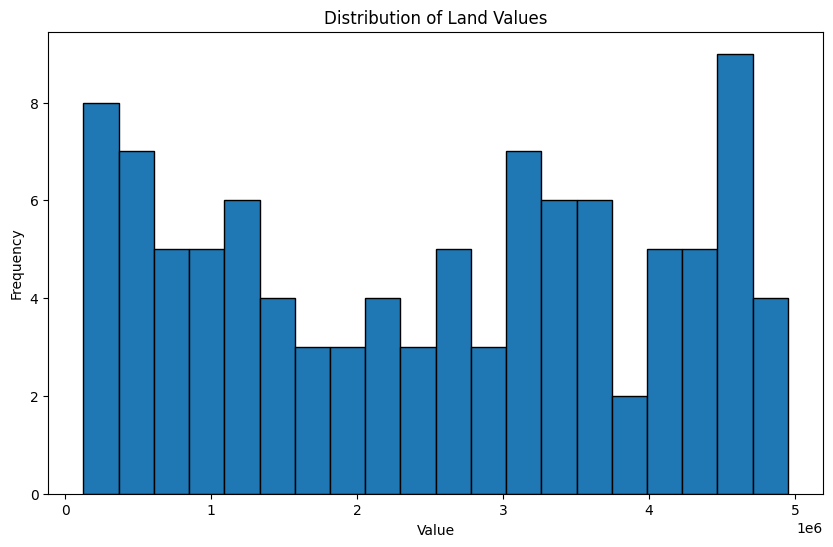

Membuat peta interaktif...
Figure saved to outputs/maps/land_value_map.html
Peta berhasil disimpan ke outputs/maps/land_value_map.html


In [3]:
# Muat variabel dari store
%store -r gdf_clean

# Create visualizations
# Histogram of values
plt.figure(figsize=(10, 6))
plt.hist(gdf_clean['value'], bins=20, edgecolor='black')
plt.title('Distribution of Land Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Interactive map
try:
    print("Membuat peta interaktif...")
    fig = create_interactive_map(gdf_clean, 'value', 'Land Value Distribution')
    
    # Simpan dulu ke file HTML
    os.makedirs('outputs/maps', exist_ok=True)
    save_plotly_figure(fig, 'outputs/maps/land_value_map.html')
    print("Peta berhasil disimpan ke outputs/maps/land_value_map.html")
    
    # Coba tampilkan dengan IFrame
    from IPython.display import IFrame
    display(IFrame(src='outputs/maps/land_value_map.html', width=1000, height=600))
    
except Exception as e:
    print(f"Error creating interactive map: {e}")
    print("Menggunakan fallback static map...")
    
    # Fallback ke static map
    fig = create_static_map(gdf_clean, 'value', 'Land Value Distribution')
    plt.show()

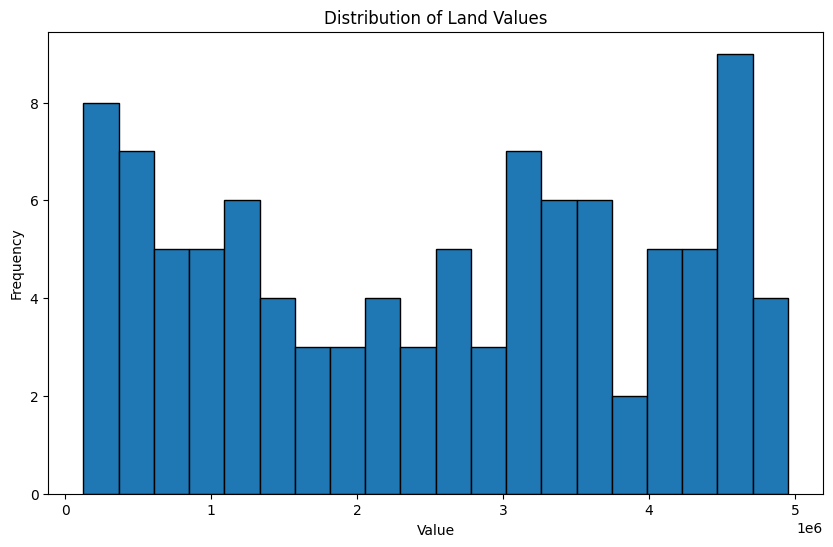

In [4]:
try:
    # Muat ulang variabel gdf_clean
    %store -r gdf_clean
    
    # Create visualizations
    # Histogram of values
    plt.figure(figsize=(10, 6))
    plt.hist(gdf_clean['value'], bins=20, edgecolor='black')
    plt.title('Distribution of Land Values')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()
    
    # Interactive map
    fig = create_interactive_map(gdf_clean, 'value', 'Land Value Distribution')
    fig.show()
    
except NameError:
    print("Variabel gdf_clean tidak ditemukan. Pastikan sel sebelumnya berhasil dijalankan.")

In [5]:
# Analisis distribusi nilai
print("ANALISIS DISTRIBUSI NILAI LAHAN")
print("=" * 50)

# Statistik deskriptif
print("Statistik Deskriptif:")
stats = gdf_clean['value'].describe()
print(stats)

# Hitung skewness dan kurtosis
from scipy import stats
skewness = stats.skew(gdf_clean['value'])
kurtosis = stats.kurtosis(gdf_clean['value'])
print(f"\nSkewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")

# Analisis kuartil
Q1 = gdf_clean['value'].quantile(0.25)
Q3 = gdf_clean['value'].quantile(0.75)
IQR = Q3 - Q1
print(f"\nKuartil 1 (Q1): {Q1:.2f}")
print(f"Kuartil 3 (Q3): {Q3:.2f}")
print(f"IQR (Interquartile Range): {IQR:.2f}")

# Identifikasi outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = gdf_clean[(gdf_clean['value'] < lower_bound) | (gdf_clean['value'] > upper_bound)]
print(f"\nJumlah outliers: {len(outliers)}")
print(f"Persentase outliers: {len(outliers)/len(gdf_clean)*100:.2f}%")

ANALISIS DISTRIBUSI NILAI LAHAN
Statistik Deskriptif:
count    1.000000e+02
mean     2.500838e+06
std      1.499624e+06
min      1.248018e+05
25%      1.121627e+06
50%      2.605873e+06
75%      3.704530e+06
max      4.951264e+06
Name: value, dtype: float64

Skewness: -0.0366
Kurtosis: -1.3415

Kuartil 1 (Q1): 1121627.45
Kuartil 3 (Q3): 3704529.71
IQR (Interquartile Range): 2582902.26

Jumlah outliers: 0
Persentase outliers: 0.00%


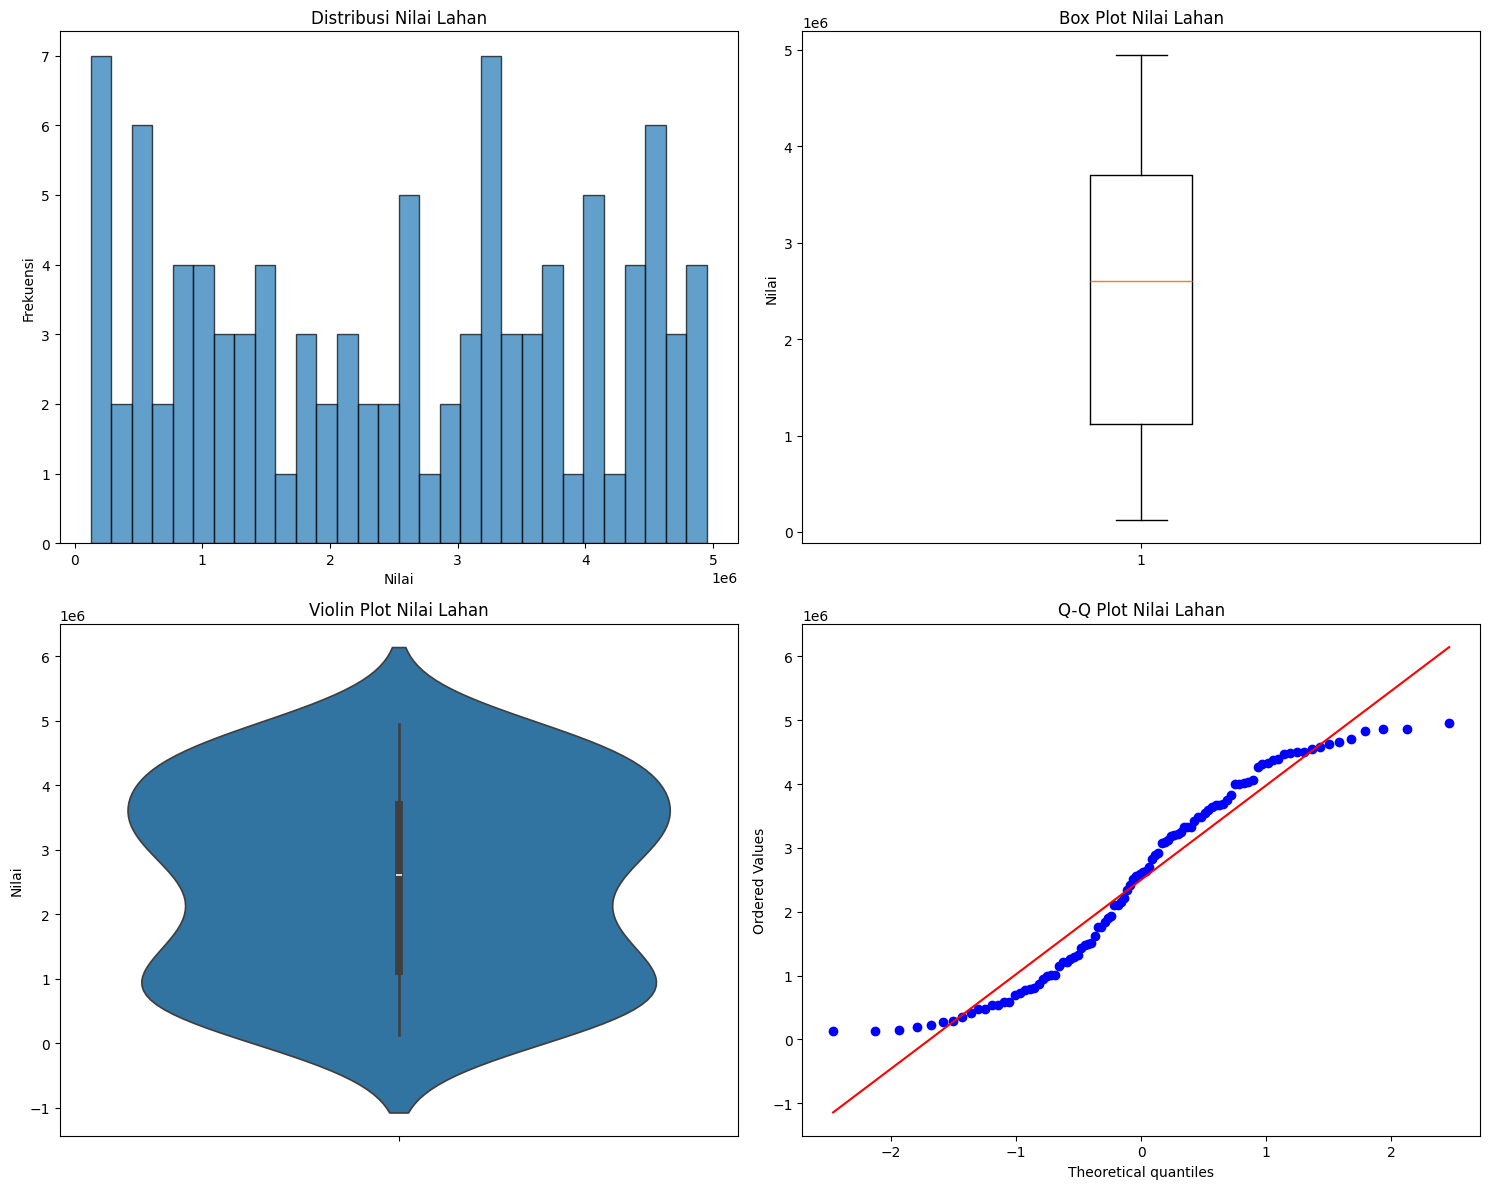

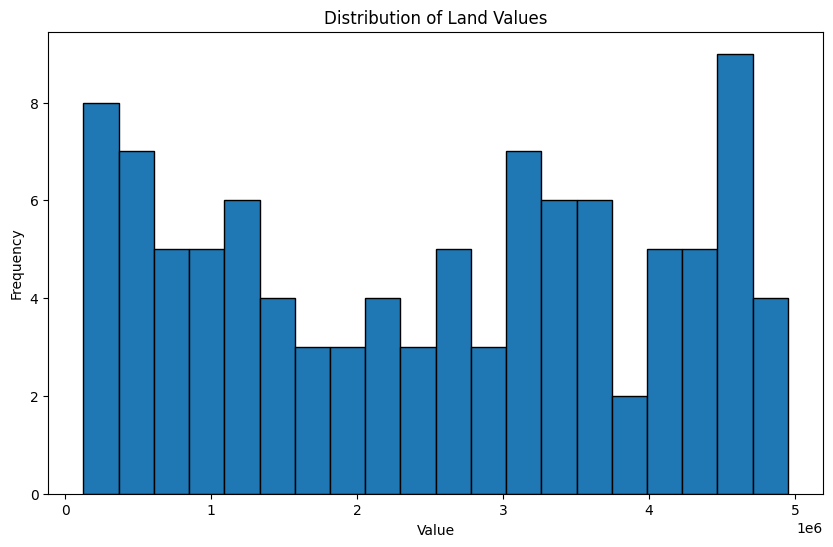

Figure saved to outputs/maps/land_value_map.html


In [6]:
# Visualisasi distribusi nilai
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Histogram
axes[0, 0].hist(gdf_clean['value'], bins=30, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribusi Nilai Lahan')
axes[0, 0].set_xlabel('Nilai')
axes[0, 0].set_ylabel('Frekuensi')

# Box plot
axes[0, 1].boxplot(gdf_clean['value'])
axes[0, 1].set_title('Box Plot Nilai Lahan')
axes[0, 1].set_ylabel('Nilai')

# Violin plot
import seaborn as sns
sns.violinplot(y=gdf_clean['value'], ax=axes[1, 0])
axes[1, 0].set_title('Violin Plot Nilai Lahan')
axes[1, 0].set_ylabel('Nilai')

# QQ plot
stats.probplot(gdf_clean['value'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot Nilai Lahan')

plt.tight_layout()
plt.show()

# Muat variabel dari store
%store -r gdf_clean

# Create visualizations
# Histogram of values
plt.figure(figsize=(10, 6))
plt.hist(gdf_clean['value'], bins=20, edgecolor='black')
plt.title('Distribution of Land Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Interactive map
try:
    fig = create_interactive_map(gdf_clean, 'value', 'Land Value Distribution')
    # Simpan dulu ke file HTML, lalu tampilkan
    save_plotly_figure(fig, 'outputs/maps/land_value_map.html')
    
    # Tampilkan peta dari file HTML
    from IPython.display import IFrame
    display(IFrame(src='outputs/maps/land_value_map.html', width=1000, height=600))
    
except Exception as e:
    print(f"Error creating map: {e}")
    print("Trying alternative approach...")
    
    # Alternatif: gunakan matplotlib untuk visualisasi sederhana
    fig, ax = plt.subplots(figsize=(10, 8))
    gdf_clean.plot(column='value', ax=ax, legend=True, 
                  cmap='viridis', markersize=50, alpha=0.7)
    ax.set_title('Land Value Distribution')
    plt.show()

ANALISIS POLA SPASIAL
Korelasi longitude-nilai: -0.0682
Korelasi latitude-nilai: 0.0101


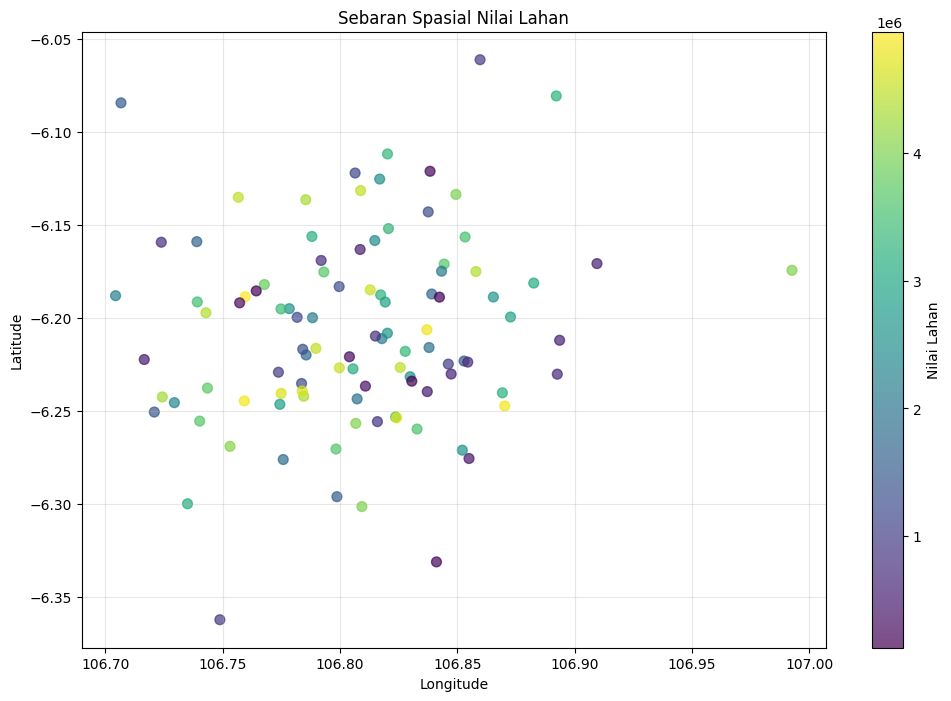

In [7]:
# ANALISIS POLA SPASIAL
print("ANALISIS POLA SPASIAL")
print("=" * 50)

# Konversi ke CRS proyeksi untuk perhitungan yang akurat
gdf_projected = gdf_clean.to_crs(epsg=3857)  # Web Mercator

# Hitung centroid pada CRS proyeksi
gdf_projected['centroid'] = gdf_projected.centroid

# Kembali ke CRS geografis untuk visualisasi
gdf_clean['centroid'] = gdf_projected['centroid'].to_crs(epsg=4326)
gdf_clean['longitude'] = gdf_clean['centroid'].x
gdf_clean['latitude'] = gdf_clean['centroid'].y

# Korelasi antara koordinat dan nilai
correlation_x = gdf_clean['longitude'].corr(gdf_clean['value'])
correlation_y = gdf_clean['latitude'].corr(gdf_clean['value'])
print(f"Korelasi longitude-nilai: {correlation_x:.4f}")
print(f"Korelasi latitude-nilai: {correlation_y:.4f}")

# Visualisasi sebaran spasial
plt.figure(figsize=(12, 8))
scatter = plt.scatter(gdf_clean['longitude'], gdf_clean['latitude'], 
                     c=gdf_clean['value'], cmap='viridis', s=50, alpha=0.7)
plt.colorbar(scatter, label='Nilai Lahan')
plt.title('Sebaran Spasial Nilai Lahan')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True, alpha=0.3)
plt.show()

ANALISIS CLUSTER SEDERHANA
Jumlah data per kategori:
value_category
Rendah    36
Tinggi    34
Sedang    30
Name: count, dtype: int64


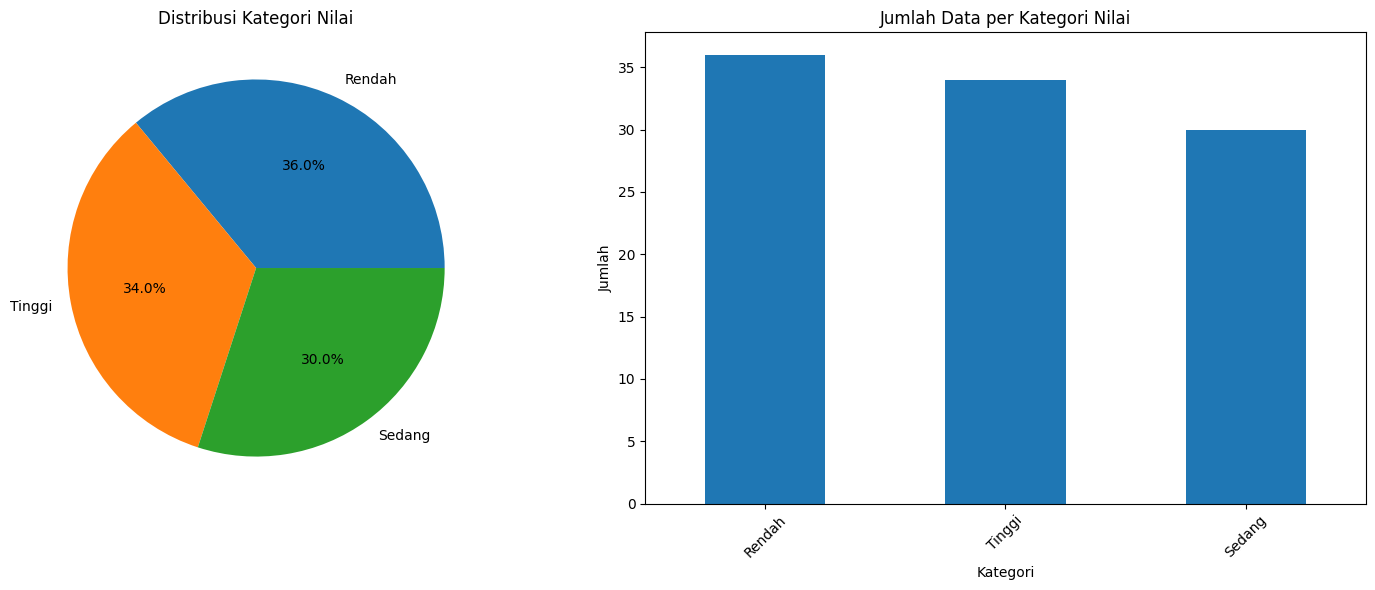

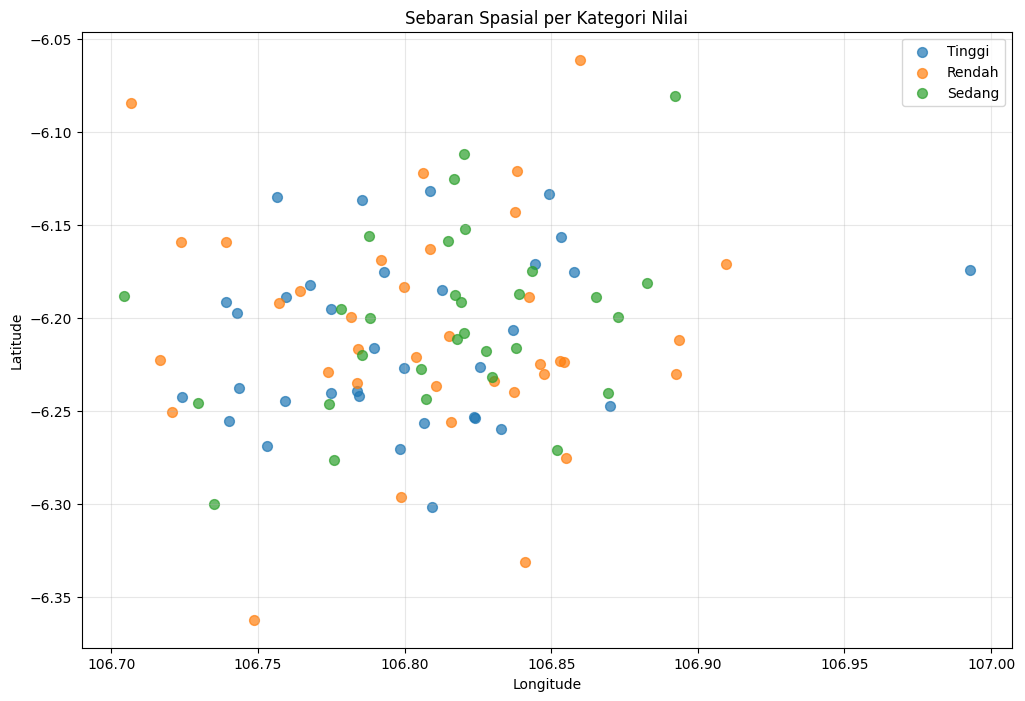

In [8]:
# Analisis cluster sederhana berdasarkan nilai
print("ANALISIS CLUSTER SEDERHANA")
print("=" * 50)

# Kategorisasi nilai
gdf_clean['value_category'] = pd.cut(gdf_clean['value'], 
                                    bins=3, 
                                    labels=['Rendah', 'Sedang', 'Tinggi'])

# Hitung jumlah per kategori
category_counts = gdf_clean['value_category'].value_counts()
print("Jumlah data per kategori:")
print(category_counts)

# Visualisasi sebaran kategori
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Pie chart
ax1.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
ax1.set_title('Distribusi Kategori Nilai')

# Bar chart
category_counts.plot(kind='bar', ax=ax2)
ax2.set_title('Jumlah Data per Kategori Nilai')
ax2.set_xlabel('Kategori')
ax2.set_ylabel('Jumlah')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Visualisasi spasial per kategori
plt.figure(figsize=(12, 8))
for category in gdf_clean['value_category'].unique():
    subset = gdf_clean[gdf_clean['value_category'] == category]
    plt.scatter(subset['longitude'], subset['latitude'], 
                label=category, s=50, alpha=0.7)

plt.title('Sebaran Spasial per Kategori Nilai')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [9]:
# Simpan hasil analisis
output_dir = 'outputs/processed_data'
os.makedirs(output_dir, exist_ok=True)

# Buat salinan tanpa kolom centroid untuk menghindari multiple geometry columns
gdf_to_save = gdf_clean[['id', 'value', 'geometry']].copy()

# Simpan data yang sudah dibersihkan
gdf_to_save.to_file(f'{output_dir}/cleaned_land_data.shp')
print(f"Data cleaned disimpan ke: {output_dir}/cleaned_land_data.shp")

# Simpan data dengan koordinat sebagai CSV
csv_data = gdf_clean[['id', 'value', 'longitude', 'latitude']].copy()
csv_data.to_csv(f'{output_dir}/cleaned_land_data.csv', index=False)
print(f"Data cleaned (CSV) disimpan ke: {output_dir}/cleaned_land_data.csv")

# Simpan statistik deskriptif
stats = gdf_clean['value'].describe()
stats.to_csv(f'{output_dir}/value_statistics.csv')
print(f"Statistik disimpan ke: {output_dir}/value_statistics.csv")

Data cleaned disimpan ke: outputs/processed_data/cleaned_land_data.shp
Data cleaned (CSV) disimpan ke: outputs/processed_data/cleaned_land_data.csv
Statistik disimpan ke: outputs/processed_data/value_statistics.csv


In [ ]:
# VISUALISASI DATA
print("VISUALISASI DATA")
print("=" * 50)

import seaborn as sns

# Histogram
plt.figure(figsize=(10, 6))
plt.hist(gdf_clean['value'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribusi Nilai Lahan')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.grid(True, alpha=0.3)
plt.show()

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(y=gdf_clean['value'])
plt.title('Box Plot Nilai Lahan')
plt.ylabel('Nilai')
plt.grid(True, alpha=0.3)
plt.show()

# Scatter plot spasial
gdf_clean['longitude'] = gdf_clean.geometry.x
gdf_clean['latitude'] = gdf_clean.geometry.y

plt.figure(figsize=(12, 8))
scatter = plt.scatter(gdf_clean['longitude'], gdf_clean['latitude'], 
                     c=gdf_clean['value'], cmap='viridis', s=50, alpha=0.7)
plt.colorbar(scatter, label='Nilai Lahan')
plt.title('Sebaran Spasial Nilai Lahan')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# ANALISIS SPASIAL LANJUTAN
print("ANALISIS SPASIAL LANJUTAN")
print("=" * 50)

from src.spatial_analysis import calculate_morans_i, detect_spatial_clusters

# Hitung Moran's I
morans_result = calculate_morans_i(gdf_clean, 'value')
print("Hasil Moran's I:")
print(f"  Moran's I: {morans_result['morans_i']:.4f}")
print(f"  Z-Score: {morans_result['z_score']:.4f}")
print(f"  P-Value: {morans_result['p_value']:.4f}")

# Deteksi cluster spasial
gdf_clustered = detect_spatial_clusters(gdf_clean, 'value')
print(f"\nJumlah cluster yang terdeteksi: {gdf_clustered['cluster'].nunique()}")
print(f"Titik noise: {len(gdf_clustered[gdf_clustered['cluster'] == -1])}")

# Visualisasi cluster
from src.visualization import plot_clusters
fig = plot_clusters(gdf_clustered, 'cluster', 'value', 'Hasil Deteksi Cluster Spasial')
plt.show()

In [ ]:
# ANALISIS STATISTIK
print("ANALISIS STATISTIK")
print("=" * 50)

# Statistik deskriptif
print("Statistik Deskriptif:")
stats = gdf_clean['value'].describe()
print(stats)

# Hitung skewness dan kurtosis
from scipy import stats as scipy_stats
skewness = scipy_stats.skew(gdf_clean['value'])
kurtosis = scipy_stats.kurtosis(gdf_clean['value'])
print(f"\nSkewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")

# Analisis kuartil
Q1 = gdf_clean['value'].quantile(0.25)
Q3 = gdf_clean['value'].quantile(0.75)
IQR = Q3 - Q1
print(f"\nKuartil 1 (Q1): {Q1:.2f}")
print(f"Kuartil 3 (Q3): {Q3:.2f}")
print(f"IQR (Interquartile Range): {IQR:.2f}")

# Identifikasi outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = gdf_clean[(gdf_clean['value'] < lower_bound) | (gdf_clean['value'] > upper_bound)]
print(f"\nJumlah outliers: {len(outliers)}")
print(f"Persentase outliers: {len(outliers)/len(gdf_clean)*100:.2f}%")

In [ ]:
# EKSPOR KE NOTEBOOK LAPORAN
from IPython.display import Markdown

# Buat markdown report
report = f"""
# LAPORAN ANALISIS KASUS LAHAN

## Ringkasan
- **Total Data**: {len(gdf_clean)}
- **Rata-rata Nilai Lahan**: {gdf_clean['value'].mean():.2f}
- **Kisaran Nilai**: {gdf_clean['value'].min():.2f} - {gdf_clean['value'].max():.2f}
- **Autokorelasi Spasial (Moran's I)**: {morans_result['morans_i']:.4f} (p-value: {morans_result['p_value']:.4f})
- **Cluster Terdeteksi**: {gdf_clustered['cluster'].nunique() - 1}
- **Titik Noise**: {len(gdf_clustered[gdf_clustered['cluster'] == -1])}

## Hasil Analisis
Analisis menunjukkan bahwa terdapat pola spasial dalam distribusi nilai lahan. 
Nilai Moran's I sebesar {morans_result['morans_i']:.4f} menunjukkan {'autokorelasi spasial yang signifikan' if morans_result['p_value'] < 0.05 else 'tidak ada autokorelasi spasial yang signifikan'}.

## Rekomendasi
Berdasarkan hasil analisis, disarankan untuk:
1. Mempertimbangkan faktor spasial dalam penentuan nilai lahan
2. Melakukan investigasi lebih lanjut pada cluster dengan nilai tinggi
3. Mempertimbangkan outlier dalam analisis kebijakan
"""

display(Markdown(report))

In [ ]:
# LAPORAN HASIL ANALISIS
print("LAPORAN HASIL ANALISIS")
print("=" * 50)
print(f"Total data: {len(gdf_clean)}")
print(f"Rata-rata nilai lahan: {gdf_clean['value'].mean():.2f}")
print(f"Standar deviasi nilai lahan: {gdf_clean['value'].std():.2f}")
print(f"Kisaran nilai lahan: {gdf_clean['value'].min():.2f} - {gdf_clean['value'].max():.2f}")
print(f"Moran's I: {morans_result['morans_i']:.4f} (p-value: {morans_result['p_value']:.4f})")
print(f"Jumlah cluster terdeteksi: {gdf_clustered['cluster'].nunique() - 1}")  # Excluding noise
print(f"Titik noise: {len(gdf_clustered[gdf_clustered['cluster'] == -1])}")

print("\nSemua hasil analisis telah disimpan ke direktory 'outputs/analysis_results/'")

In [ ]:
# SIMPAN HASIL ANALISIS
print("SIMPAN HASIL ANALISIS")
print("=" * 50)

import os

# Buat direktori output jika belum ada
output_dir = 'outputs/analysis_results'
os.makedirs(output_dir, exist_ok=True)

# Simpan data yang sudah diproses
gdf_clean.to_file(f'{output_dir}/processed_data.shp')
print(f"Data processed disimpan ke: {output_dir}/processed_data.shp")

# Simpan data dengan cluster
gdf_clustered.to_file(f'{output_dir}/clustered_data.shp')
print(f"Data clustered disimpan ke: {output_dir}/clustered_data.shp")

# Simpan statistik
stats_df = gdf_clean['value'].describe().reset_index()
stats_df.columns = ['statistic', 'value']
stats_df.to_csv(f'{output_dir}/value_statistics.csv', index=False)
print(f"Statistik disimpan ke: {output_dir}/value_statistics.csv")

# Simpan hasil Moran's I
morans_df = pd.DataFrame([morans_result])
morans_df.to_csv(f'{output_dir}/morans_i_results.csv', index=False)
print(f"Hasil Moran's I disimpan ke: {output_dir}/morans_i_results.csv")